In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pvlib
print(pvlib.__version__)

0.9.1


In [57]:
import datetime

# METEO à Toulouse

In [5]:
# where is Pechbusque...
# name,latitude, longitude, altitude, timezone

coordinates = {
    'Montpellier' : (43.58, 3.97, 6.0, 'Europe/Paris'),
    'Pechbusque': (43.515, 1.465, 279.0, 'Europe/Paris')
}

In [50]:
lieu = 'Pechbusque'

In [51]:
latitude, longitude, altitude, time_zone = coordinates[lieu]

In [52]:
# récupère infos de PV-GIS

df_weather, months, inputs, metadata = pvlib.iotools.get_pvgis_tmy(latitude=latitude,
                                         longitude=longitude,
                                         map_variables=True,
                                         )

In [53]:
df_weather.columns

Index(['temp_air', 'relative_humidity', 'ghi', 'dni', 'dhi', 'IR(h)',
       'wind_speed', 'wind_direction', 'pressure'],
      dtype='object')

In [54]:
df_weather.head(24)

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
time(UTC),,,,,,,,,
2005-01-01 00:00:00+00:00,9.12,98.04,0.0,0.00,0.0,282.64,1.94,304.0,99986.0
2005-01-01 01:00:00+00:00,9.02,98.05,0.0,0.00,0.0,276.86,2.08,304.0,99986.0
2005-01-01 02:00:00+00:00,8.92,98.06,0.0,0.00,0.0,271.09,2.23,304.0,99986.0
2005-01-01 03:00:00+00:00,8.82,98.07,0.0,0.00,0.0,265.31,2.37,304.0,99964.0
2005-01-01 04:00:00+00:00,8.72,98.08,0.0,0.00,0.0,259.54,2.51,304.0,99941.0
2005-01-01 05:00:00+00:00,8.62,98.08,0.0,0.00,0.0,253.76,2.66,303.0,99919.0
2005-01-01 06:00:00+00:00,8.52,98.09,0.0,0.00,0.0,247.99,2.80,304.0,99925.0
2005-01-01 07:00:00+00:00,8.43,98.10,0.0,0.00,0.0,242.22,2.95,305.0,99932.0
2005-01-01 08:00:00+00:00,9.71,97.27,5.0,0.00,5.0,259.40,2.34,306.0,99938.0


Text(0, 0.5, 'Irradiance [W/m²]')

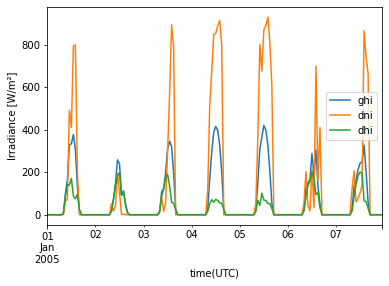

In [55]:
# Irradiance

first_week = df_weather.head(24*7)  # Plotting 7 days, each one has 24 hours or entries
first_week[['ghi', 'dni', 'dhi']].plot()
plt.ylabel('Irradiance [W/m²]')

In [92]:
print(f"GHI annuel : {df_weather['ghi'].sum()/1000:.0f} kWh/an")

GHI annuel : 1363 kWh/an


In [101]:
# on force tous les timestamps pour avoir la même année : 2023

new_index = [ datetime.datetime(2023, d.month, d.day, d.hour, d.minute, tzinfo=d.tzinfo) for d in df_weather.index ]
new_index = pd.DatetimeIndex(new_index)

df_weather = df_weather.set_index(new_index)

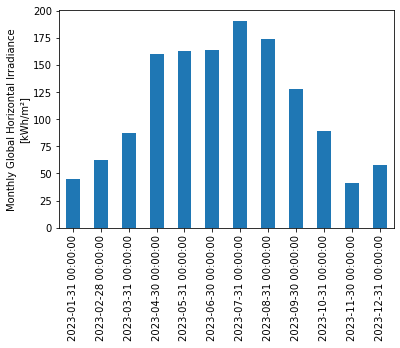

In [109]:
# données mensuelles

monthly_ghi = df_weather['ghi'].resample('M').sum()/1000
monthly_ghi = monthly_ghi.tz_localize(None)  # pour afficher sans la tz

monthly_ghi.plot.bar()

plt.ylabel('Monthly Global Horizontal Irradiance\n[kWh/m²]');

In [113]:
print(f"DNI annuel : {df_weather['dni'].sum()/1000:.0f} kWh/an")

DNI annuel : 1377 kWh/an


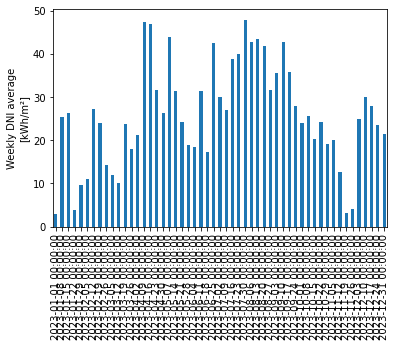

In [112]:
# données DNI hebdos

weekly_dni = df_weather['dni'].resample('W').sum()/1000
weekly_dni = weekly_dni.tz_localize(None)  # pour afficher sans la tz

weekly_dni.plot.bar()

plt.ylabel('Weekly DNI average\n[kWh/m²]');

### 1- Comparaison des modèles METEO

In [61]:
# REFERENCE : fichier PV Watts horaire Montpellier, azimuth 180° (sud), tilt 0°.

filename = "c:/Users/benjamin.deporte/Documents/095_Code_Python_Toy/PV/Scenarii/Production/pvwatts_hourly_8505Wc_tilt0_for_NB.csv"

results_pvwatts = pd.read_csv(filename, sep=";", header=15, encoding='utf-8', nrows=8760) # dtype=dtype) #, converters=converters)

# Solar Irradiance = The total irradiance incident on the plane of photovoltaic array in kilowatt-hours per square meter per day. 
# PVWatts calculates the monthly and annual values from the hourly plane-of-array irradiance values, 
# which it calculates from hourly diffuse horizontal irradiance (DHI) and direct normal irradiance (DNI) data in the weather file for the location, 
# taking into consideration the position of the sun and the orientation of photovoltaic modules in the array.

In [62]:
results_pvwatts

,Month,Day,Hour,Beam Irradiance (W/m^2),Diffuse Irradiance (W/m^2),Ambient Temperature (C),Wind Speed (m/s),Plane of Array Irradiance (W/m^2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
0,1,1,0,0,0,2.7,3.1,0.0,2.7,0.0,0.0
1,1,1,1,0,0,4.1,2.7,0.0,4.1,0.0,0.0
2,1,1,2,0,0,4.8,2.4,0.0,4.8,0.0,0.0
3,1,1,3,0,0,4.9,2.0,0.0,4.9,0.0,0.0
4,1,1,4,0,0,4.5,1.0,0.0,4.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8755,12,31,19,0,0,-0.3,3.1,0.0,-0.3,0.0,0.0
8756,12,31,20,0,0,-0.7,1.0,0.0,-0.7,0.0,0.0
8757,12,31,21,0,0,-0.7,1.0,0.0,-0.7,0.0,0.0
8758,12,31,22,0,0,-0.1,0.7,0.0,-0.1,0.0,0.0


In [63]:
# Valeurs annuelles :

print(f"Beam Irradiance = {results_pvwatts['Beam Irradiance (W/m^2)'].sum()/1000:.2f} kWh/an")
print(f"Diffuse Irradiance = {results_pvwatts['Diffuse Irradiance (W/m^2)'].sum()/1000:.2f} kWh/an")
print(f"POA Irradiance = {results_pvwatts['Plane of Array Irradiance (W/m^2)'].sum()/1000:.2f} kWh/an")

Beam Irradiance = 1319.86 kWh/an
Diffuse Irradiance = 665.86 kWh/an
POA Irradiance = 1465.45 kWh/an


In [64]:
# Comparaison avec pvlib

In [65]:
# where is Pechbusque...
# latitude, longitude, name, altitude, timezone

coordinates = [
    (43.58, 3.97, 'Montpellier', 6.0, 'Europe/Paris'),
    (43.515, 1.465,'Pechbusque', 279.0, 'Europe/Paris')
]

In [66]:
# récupère météo

tmys = []

for location in coordinates:
    latitude, longitude, name, altitude, timezone = location
    weather = pvlib.iotools.get_pvgis_tmy(latitude, longitude, map_variables=True)[0]  # map_variables=True ?!
    weather.index.name = "utc_time"
    
    tmys.append(weather)
    
# tmys[0] est le temps à Montpellier

In [67]:
tmys[0]

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
utc_time,,,,,,,,,
2007-01-01 00:00:00+00:00,11.40,87.21,0.0,0.0,0.0,298.93,4.91,199.0,103456.0
2007-01-01 01:00:00+00:00,11.39,89.09,0.0,0.0,0.0,302.11,4.46,199.0,103409.0
2007-01-01 02:00:00+00:00,11.38,90.97,0.0,0.0,0.0,305.29,4.02,199.0,103362.0
2007-01-01 03:00:00+00:00,11.36,92.84,0.0,0.0,0.0,308.47,3.57,207.0,103312.0
2007-01-01 04:00:00+00:00,11.35,94.72,0.0,0.0,0.0,311.65,3.13,215.0,103262.0
...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00+00:00,11.45,77.83,0.0,0.0,0.0,283.03,7.14,324.0,102946.0
2012-12-31 20:00:00+00:00,11.44,79.71,0.0,0.0,0.0,286.21,6.69,324.0,102962.0
2012-12-31 21:00:00+00:00,11.43,81.59,0.0,0.0,0.0,289.39,6.25,324.0,102946.0


In [68]:
tmys[1]

,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
utc_time,,,,,,,,,
2005-01-01 00:00:00+00:00,9.12,98.04,0.0,0.0,0.0,282.64,1.94,304.0,99986.0
2005-01-01 01:00:00+00:00,9.02,98.05,0.0,0.0,0.0,276.86,2.08,304.0,99986.0
2005-01-01 02:00:00+00:00,8.92,98.06,0.0,0.0,0.0,271.09,2.23,304.0,99986.0
2005-01-01 03:00:00+00:00,8.82,98.07,0.0,0.0,0.0,265.31,2.37,304.0,99964.0
2005-01-01 04:00:00+00:00,8.72,98.08,0.0,0.0,0.0,259.54,2.51,304.0,99941.0
...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00+00:00,9.62,97.99,0.0,0.0,0.0,311.51,1.22,320.0,99361.0
2015-12-31 20:00:00+00:00,9.52,98.00,0.0,0.0,0.0,305.73,1.36,313.0,99377.0
2015-12-31 21:00:00+00:00,9.42,98.01,0.0,0.0,0.0,299.96,1.51,306.0,99351.0


In [69]:
# Valeurs annuelles :

print(f"\n -- MONTPELLIER (PVGis) --")
print(f"Direct Normal Irradiance = {tmys[0]['dni'].sum()/1000:.2f} kWh/an")
print(f"Diffuse Horizontal Irradiance = {tmys[0]['dhi'].sum()/1000:.2f} kWh/an")
print(f"GHI = {tmys[0]['ghi'].sum()/1000:.2f} kWh/an")

print(f"\n -- PECHBUSQUE (PVGis) --")
print(f"Direct Normal Irradiance = {tmys[1]['dni'].sum()/1000:.2f} kWh/an")
print(f"Diffuse Horizontal Irradiance = {tmys[1]['dhi'].sum()/1000:.2f} kWh/an")
print(f"GHI = {tmys[1]['ghi'].sum()/1000:.2f} kWh/an -- vs 1425 kWh/an sur le site PVGis")


 -- MONTPELLIER (PVGis) --
Direct Normal Irradiance = 1890.85 kWh/an
Diffuse Horizontal Irradiance = 532.69 kWh/an
GHI = 1588.81 kWh/an

 -- PECHBUSQUE (PVGis) --
Direct Normal Irradiance = 1377.42 kWh/an
Diffuse Horizontal Irradiance = 607.02 kWh/an
GHI = 1362.93 kWh/an -- vs 1425 kWh/an sur le site PVGis


### Conclusion 1 : 
- POA Irradiance = GHI ici (tilt 0°C) = 1465 kWh/an PV Watts vs 1588 kWh/an PVGIS (+123 kWh/an)
- Diffus : 666 kWh/an PV Watts vs 533 kWh PV GIS (-133 kWh/an)

### 2- Comparaison avec Etude SMA

In [70]:
module_trina_vertex_405_for_pvwatts = {
    'pdc0' : 405.0, 
    'gamma_pdc' : -0.34e-2
    }

In [71]:
inverter_sma_tri_TL_8kVA_for_pvwatts = {
    'pdc0' : 15000.0,
    'eta_inv_nom' : 0.98,
    'eta_inv_ref' : 0.98
}

In [72]:
losses_parameters_for_pvwatts = {
    'losses' : 14.08
        # float(pvlib.pvsystem.pvwatts_losses())
    }

array_losses_parameters_for_pvwatts = {
    'dc_ohmic_percent' : 1.0
}

In [73]:
# Construction d'un système avec algorythme PV Watts

from pvlib.pvsystem import PVSystem, Array, FixedMount
from pvlib.location import Location
from pvlib.modelchain import ModelChain

results = {}

temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

for location, weather in zip(coordinates, tmys):
    latitude, longitude, name, altitude, timezone = location
    
    location = Location(
        latitude,
        longitude,
        name=name,
        altitude=altitude,
        tz=timezone,
    )
    
    mount = FixedMount(surface_tilt=0.0, surface_azimuth=180.0)
    
    array = Array(
        mount=mount,
        module_parameters=module_trina_vertex_405_for_pvwatts,
        temperature_model_parameters=temperature_model_parameters,
        modules_per_string=21,
        strings=1,
        array_losses_parameters=array_losses_parameters_for_pvwatts
    )
      
    system = PVSystem(arrays=[array],
                      inverter_parameters=inverter_sma_tri_TL_8kVA_for_pvwatts,
                      losses_parameters=losses_parameters_for_pvwatts
                      )
    
    
    mc = ModelChain.with_pvwatts(system,
                                 location
                                 )
    
    mc.run_model(weather)
        
    results[name] = mc.results

In [74]:
r = results['Montpellier']

In [75]:
# On regarde d'abord ce que le modèle a utilisé comme irradiance...

r.total_irrad

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
utc_time,,,,,
2007-01-01 00:00:00+00:00,0.0,-0.0,0.0,0.0,0.0
2007-01-01 01:00:00+00:00,0.0,-0.0,0.0,0.0,0.0
2007-01-01 02:00:00+00:00,0.0,-0.0,0.0,0.0,0.0
2007-01-01 03:00:00+00:00,0.0,-0.0,0.0,0.0,0.0
2007-01-01 04:00:00+00:00,0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...
2012-12-31 19:00:00+00:00,0.0,-0.0,0.0,0.0,0.0
2012-12-31 20:00:00+00:00,0.0,-0.0,0.0,0.0,0.0
2012-12-31 21:00:00+00:00,0.0,-0.0,0.0,0.0,0.0


In [76]:
list_poa = ['poa_global', 'poa_direct', 'poa_diffuse', 'poa_sky_diffuse', 'poa_ground_diffuse']

for p in list_poa:
    print (f"{p} = {r.total_irrad[p].sum()/1000:.2f} kWh/an")


poa_global = 1587.09 kWh/an
poa_direct = 1054.53 kWh/an
poa_diffuse = 532.56 kWh/an
poa_sky_diffuse = 532.56 kWh/an
poa_ground_diffuse = 0.00 kWh/an


In [77]:
# on regarde maintenant la sortie DC

r.dc

utc_time
2007-01-01 00:00:00+00:00    0.0
2007-01-01 01:00:00+00:00    0.0
2007-01-01 02:00:00+00:00    0.0
2007-01-01 03:00:00+00:00    0.0
2007-01-01 04:00:00+00:00    0.0
                            ... 
2012-12-31 19:00:00+00:00    0.0
2012-12-31 20:00:00+00:00    0.0
2012-12-31 21:00:00+00:00    0.0
2012-12-31 22:00:00+00:00    0.0
2012-12-31 23:00:00+00:00    0.0
Name: p_mp, Length: 8760, dtype: float64

In [78]:
print(f"DC Output = {r.dc.sum()/1000:.2f} kWh/an")

DC Output = 10910.66 kWh/an


In [79]:
print(f"AC Output = {r.ac.sum()/1000:.2f} kWh/an")

AC Output = 10341.01 kWh/an


In [80]:
#-----------------------------------------------------------------------------------------------------
# données module Trina : sources = datasheet Trina, base CEC, autres info reprises de la db SAM
#-----------------------------------------------------------------------------------------------------

module_trina_vertex_405 = {
    "Vintage" : 2021,  # datasheet info
    "Area" : 1.91,
    "Material" : "Mono-c-Si", # datasheet info
    "Cells_in_Series" : 60, # CEC database info
    "Parallel_Strings" : 2, # CEC database info
    "Isco" : 12.34, # short circuit current : datasheet info
    "Voco" : 41.4, # open circuit voltage : datasheet info
    "Impo" : 11.77, # max power current : datasheet info
    "Vmpo" : 34.4, # max power voltage : datasheet info
    "Aisc" : 0.0004, # short circuit temperature coefficient : datasheet info plus pénalisante que CEC info
    "Aimp" : 0.0004, # maximum power temperature coefficient : inconnu, on reconduit Aisc
    "C0" : 1.01284, # coefficients relating Im p to G : ?
    "C1" : -0.01284, # coefficients relating Im p to G : ?
    "Bvoco" : -0.266, # open circuit temperature coefficient : CEC info plus pénalisante que datasheet info 
    "Mbvoc" : 0, # relates βoc,re f to effective irradiance : 0 ?
    "Bvmpo" : -0.266, # maximum power voltage temperature coefficient : inconnnu, on reconduit Bvoco
    "Mbvmp" : 0, # relates βm p,re f to effective irradiance : 0 ?
    "N" : 1.4032, # diode factor : ?
    "C2" : 0.279317, # coefficients relating Vm p to G : ?
    "C3" : -7.24463, # coefficients relating Vm p to G : ?
    "A0" : 0.928385, # air mass coefficients 0...4 - spectral effects on Isc to the variation of air mass over the day - ?
    "A1" : 0.068093, # air mass coefficients 0...4 - spectral effects on Isc to the variation of air mass over the day - ?
    "A2" : -0.015774, # air mass coefficients 0...4 - spectral effects on Isc to the variation of air mass over the day - ?
    "A3" : 0.001661, # air mass coefficients 0...4 - spectral effects on Isc to the variation of air mass over the day - ?
    "A4" : -0.000069, # air mass coefficients 0...4 - spectral effects on Isc to the variation of air mass over the day - ?
    "B0" : 1, # incidence angle modifier coefficients 0...5 - optical effects on Isc to the angle of incidence AOI (Section 5.1) - ?
    "B1" : -0.002438, # incidence angle modifier coefficients 0...5 - optical effects on Isc to the angle of incidence AOI (Section 5.1) - ?
    "B2" : 0.00031, # incidence angle modifier coefficients 0...5 - optical effects on Isc to the angle of incidence AOI (Section 5.1) - ?
    "B3" : -0.000012, # incidence angle modifier coefficients 0...5 - optical effects on Isc to the angle of incidence AOI (Section 5.1) - ?
    "B4" : 0.0, # incidence angle modifier coefficients 0...5 - optical effects on Isc to the angle of incidence AOI (Section 5.1) - ?
    "B5" : -0.0, # incidence angle modifier coefficients 0...5 - optical effects on Isc to the angle of incidence AOI (Section 5.1) - ?
    "DTC" : 3.0, # ??
    "FD" : 1, # fraction of diffuse irradiance used by module
    "A" : -3.40641, # ??
    "B" : -0.084208, # ??
    "C4" : 0.996446, # coefficients relating Ix to G : ?
    "C5" : 0.003554, # coefficients relating Ix to G : ?
    "IXO" : 4.97599, # ?
    "IXXO" : 3.18803, # ?
    "C6" : 1.15535, # coefficients relating Ixx to G : ?
    "C7" : -0.155353, # coefficients relating Ixx to G : ?
    "Notes" : "Format SAM model, Source: CEC database, 11-Aug-2022",
    "Name" : "Trina_Vertex_405Wc_TSM-DE09"
}

In [81]:
#-----------------------------------------------------------------------------------------------------
#--- Onduleur Référence : SMA Tripower 8.0 -----------------------------------------------------------
#-----------------------------------------------------------------------------------------------------

inverter_sma_tri_TL_8kVA = {
    "Vac" : 480.0, # Nominal voltage, -- inchangé -- essai à 230 : non, essai à 380 neg ; essai à 480
    "Pso" : 44.0, # Power consumption during operation -- inchangé
    "Paco" : 8000.0, # Maximum AC power - ok
    "Pdco" : 15000.0, # Maximum DC power - changé de 12000 à 15000
    "Vdco" : 580.0, # Nominal DC voltage - changé de 600 à 580
    "C0" : -7.06449e-07, # Curvature between AC power and DC power W−1 : data du SMA STP 12000TL db CEC -- inchangé
    "C1" : -3.5e-05, # Coefficient of Pd c,0 variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC -- inchangé
    "C2" : -0.000328, # Coefficient of Pso variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC -- inchangé
    "C3" : -0.001748, # Coefficient of C0 variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC -- inchangé
    "Pnt" : 3.6, # Inverter night time loss : ? -- inchangé -- essai à 3.6
    "Vdcmax" : 1000.0, # Maximum DC voltage -- ok
    "Idcmax" : 20.0, # Maximum DC current -- ok
    "Mppt_low" : 260.0, # min MPP voltage -- changé de 330 à 260
    "Mppt_high" : 800.0, # max MPP voltage -- inchangé
    "CEC_Date" : "N/A",
    "CEC_Type" : "N/A"
}

In [82]:
#-----------------------------------------------------------------------------------------------------
#--- Onduleur SMA Tripower Smart Energy --------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------

inverter_sma_tripower_sme = {
    "Vac" : 230.0, # Nominal voltage,
    "Pso" : 44.0, # Power consumption during operation
    "Paco" : 8000.0, # Maximum AC power
    "Pdco" : 12000.0, # Maximum DC power
    "Vdco" : 600.0, # Nominal DC voltage
    "C0" : -7.06449e-07, # Curvature between AC power and DC power W−1 : data du SMA STP 12000TL db CEC
    "C1" : -3.5e-05, # Coefficient of Pd c,0 variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC
    "C2" : -0.000328, # Coefficient of Pso variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC
    "C3" : -0.001748, # Coefficient of C0 variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC
    "Pnt" : 0.075, # Inverter night time loss : ?
    "Vdcmax" : 1000.0, # Maximum DC voltage
    "Idcmax" : 20.0, # Maximum DC current
    "Mppt_low" : 330.0, # min MPP voltage
    "Mppt_high" : 800.0, # max MPP voltage
    "CEC_Date" : "N/A",
    "CEC_Type" : "N/A"
}

In [83]:
#-----------------------------------------------------------------------------------------------------
#--- Onduleur custom ---------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------

inverter_custom = {
    "Vac" : 380.0, # Nominal voltage, 
    "Pso" : 44.0, # Power consumption during operation -- inchangé
    "Paco" : 8000.0, # Maximum AC power
    "Pdco" : 15000.0, # Maximum DC power
    "Vdco" : 580.0, # Nominal DC voltage
    "C0" : -1e-6, # Curvature between AC power and DC power W−1 : data du SMA STP 12000TL db CEC -- inchangé
    "C1" : -3.5e-05, # Coefficient of Pd c,0 variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC -- inchangé
    "C2" : -0.000328, # Coefficient of Pso variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC -- inchangé
    "C3" : -0.001748, # Coefficient of C0 variation with DC input voltage V−1 : data du SMA STP 12000TL db CEC -- inchangé
    "Pnt" : 3.6, # Inverter night time loss : ? -- inchangé -- essai à 3.6
    "Vdcmax" : 1000.0, # Maximum DC voltage
    "Idcmax" : 30.0, # Maximum DC current
    "Mppt_low" : 260.0, # min MPP voltage
    "Mppt_high" : 800.0, # max MPP voltage
    "CEC_Date" : "N/A",
    "CEC_Type" : "N/A"
}

In [84]:
# # module, onduleur...

# sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
# sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

# # module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
# module = pd.Series(module_trina_vertex_405)
# # inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']
# inverter = pd.Series(inverter_sma_tripower_sme)

# inverter_ref = sapm_inverters['SMA_America__STP12000TL_US_10__480V_']  # SMA Tri 12kVA
# module_ref = sandia_modules['Suniva_Titan_240__2009__E__']   # module ancien à 240 Wc

# temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [85]:
# sandia_modules.transpose().to_csv('../Databases/sandia_modules.csv')  # dernier update = 2012 ?!
# sapm_inverters.transpose().to_csv('../Databases/sapm_inverters.csv')  # dernier update = 

In [86]:
# module = module_trina_vertex_405
# inverter = inverter_sma_tri_ref_8kVA

In [87]:
# # Design PV OOP

# from pvlib.pvsystem import PVSystem, Array, FixedMount
# from pvlib.location import Location
# from pvlib.modelchain import ModelChain

# energies = {}

# for location, weather in zip(coordinates, tmys):
#     latitude, longitude, name, altitude, timezone = location
    
#     location = Location(
#         latitude,
#         longitude,
#         name=name,
#         altitude=altitude,
#         tz=timezone,
#     )
    
#     mount = FixedMount(surface_tilt=0.0, surface_azimuth=180.0)
    
#     array = Array(
#         mount=mount,
#         module_parameters=module,
#         temperature_model_parameters=temperature_model_parameters,
#         modules_per_string=21,
#         strings=1
#     )
    
#     system = PVSystem(arrays=[array], inverter_parameters=inverter)
    
#     mc = ModelChain(system, location,
#                     spectral_model='no_loss',  # on essaie spectral model = no loss...
#     )
    
#     mc.run_model(weather)
#     annual_energy = mc.results.ac.sum()
    
#     energies[name] = annual_energy

# energies = pd.Series(energies)

# energies.plot(kind='bar', rot=0)

# plt.ylabel('Yearly energy yield (W hr)')